In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore', category=FutureWarning) 

In [2]:
df=pd.read_csv('Merged_Dataset.csv')

In [3]:
df.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y'],
      dtype='object')

In [4]:
df_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB


In [5]:
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [6]:
df.describe()

,Quantity,TotalValue,Price_x,Price_y
count,1000.000000,1000.000000,1000.00000,1000.00000
mean,2.537000,689.995560,272.55407,272.55407
std,1.117981,493.144478,140.73639,140.73639
min,1.000000,16.080000,16.08000,16.08000
25%,2.000000,295.295000,147.95000,147.95000
50%,3.000000,588.880000,299.93000,299.93000
75%,4.000000,1011.660000,404.40000,404.40000
max,4.000000,1991.040000,497.76000,497.76000


In [7]:
df.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64

In [9]:
# Convert date columns to datetime format
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')
df['SignupDate'] = pd.to_datetime(df['SignupDate'], errors='coerce')

# Check for duplicate entries
duplicates = df.duplicated().sum()

# Identify potential redundant columns
redundant_columns = ['Price_x', 'Price_y'] if df['Price_x'].equals(df['Price_y']) else []

# Remove duplicate column if found redundant
df_cleaned = df.drop(columns=redundant_columns) if redundant_columns else df.copy()

# Check unique values in categorical columns
categorical_columns = ['CustomerID', 'ProductID', 'Region', 'Category']
unique_values = {col: df_cleaned[col].nunique() for col in categorical_columns}

duplicates, redundant_columns, unique_values

(0,
 ['Price_x', 'Price_y'],
 {'CustomerID': 199, 'ProductID': 100, 'Region': 4, 'Category': 4})

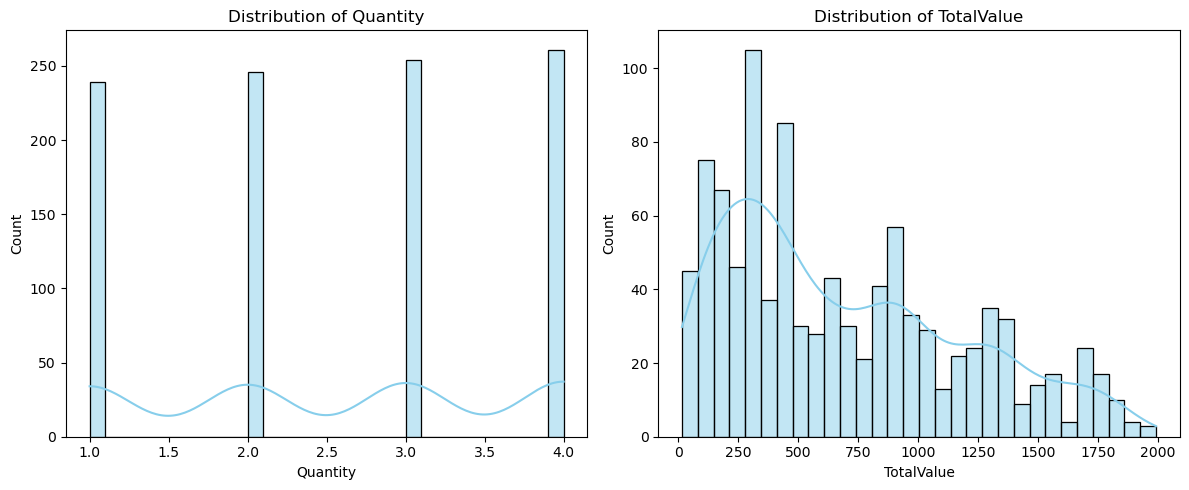

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot numerical distributions
numerical_columns = ['Quantity', 'TotalValue']
plt.figure(figsize=(12, 5))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, 2, i)
    sns.histplot(df_cleaned[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

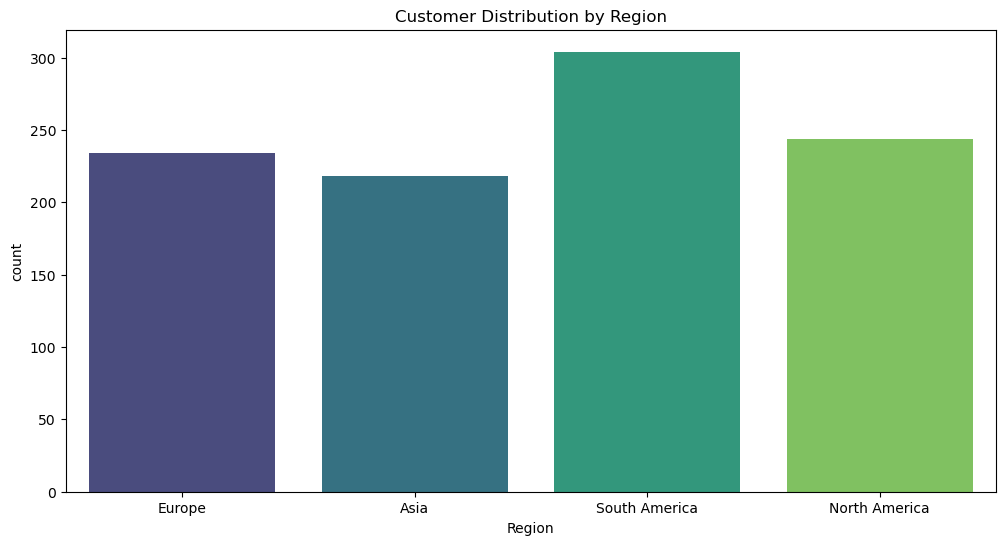

In [11]:
# Analyze categorical distributions
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='Region', palette='viridis')
plt.title('Customer Distribution by Region')
plt.show()

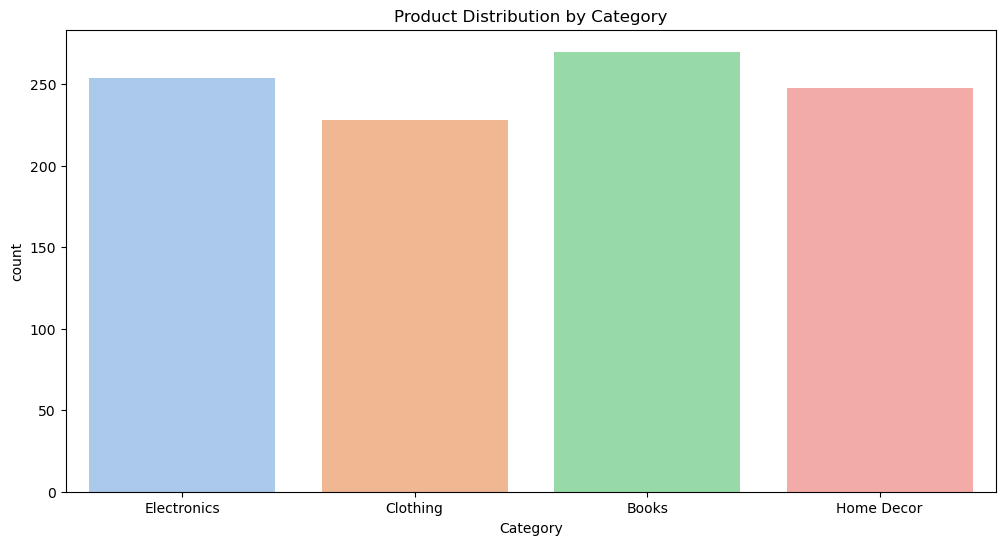

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='Category', palette='pastel')
plt.title('Product Distribution by Category')
plt.show()


1. In each region, a few products are much more popular than others. People in different regions have different preferences, but some products are top choices everywhere. This can help businesses focus on what customers like the most in each area and make better decisions about stocking and promotions.

In [6]:
df['ProductName'].nunique()

66

In [7]:
top_products_by_region = df.groupby(['Region', 'ProductName'])['ProductName'].count().reset_index(name='Count')


In [13]:
top_3_products = top_products_by_region.sort_values(['Region', 'Count'], ascending=[True, False]).groupby('Region').head(3)

print(top_3_products)

            Region            ProductName  Count
12            Asia    BookWorld Biography      9
39            Asia      HomeSense T-Shirt      9
8             Asia  ActiveWear Smartwatch      8
67          Europe         ActiveWear Rug     12
106         Europe   SoundWave Headphones     12
121         Europe       TechPro Textbook      9
170  North America   SoundWave Headphones     13
132  North America  ActiveWear Smartwatch     10
136  North America    BookWorld Biography      9
196  South America  ActiveWear Smartwatch     15
198  South America    ActiveWear Textbook     13
231  South America     SoundWave Cookbook     11


2. Sales in each region are higher during certain months, often due to seasonal trends or festivals. People tend to buy more during these periods, making them the best time for business. Knowing this can help companies prepare better by stocking up in advance and offering special deals when demand is naturally higher.

In [15]:
df['Month'] = pd.to_datetime(df['TransactionDate']).dt.month  

In [20]:
highest_sales_month = (
    df.groupby(['Region', 'Month'])['TotalValue'].sum().reset_index().sort_values(['Region', 'TotalValue'], ascending=[True, False])
    .groupby('Region').first().reset_index()
)

print(highest_sales_month)

          Region  Month  TotalValue
0           Asia      7    19755.79
1         Europe      1    19287.27
2  North America      4    22969.02
3  South America      7    27602.77


3. We can use this analysis for target marketing by identifying the top customers who frequently buy a specific product. When launching a similar new product, these customers should be targeted first. This approach helps boost sales, reduce marketing costs, and improve customer loyalty by offering relevant products to those most likely to buy again.

In [30]:
def get_top_customers_for_product(df, product_name):
    product_df = df[df['ProductName'].str.lower() == product_name.lower()]
    top_customers = product_df.groupby(['CustomerID'], as_index=False).agg(
        total_quantity=('Quantity', 'sum'),
        total_value=('TotalValue', 'sum')
    )
    top_customers_sorted = top_customers.sort_values(by=['total_quantity', 'total_value'], ascending=[False, False])
    return top_customers_sorted.head(10)

product_name = "TechPro Headphones"  # Replace with any product name
top_customers = get_top_customers_for_product(df, product_name)
print(top_customers)


   CustomerID  total_quantity  total_value
3       C0065               4      1734.56
6       C0087               4      1734.56
7       C0100               4      1734.56
9       C0105               4      1734.56
14      C0163               4      1734.56
0       C0001               3      1300.92
2       C0050               3      1300.92
8       C0102               3      1300.92
15      C0165               3      1300.92
1       C0027               2       867.28


4. When a customer opens the app, we should recommend products based on their past purchases. For example, if they previously bought clothing, show similar items like accessories,etc. By tailoring recommendations to their shopping history, we can make the experience more relevant and increase the likelihood of them making another purchase. this is example of item based filtering.

In [31]:
def get_most_preferred_category(df):
    customer_category = df.groupby(['CustomerName', 'Region'])['Category'].agg(lambda x: x.mode()[0]).reset_index()
    return customer_category
customer_category_preferences = get_most_preferred_category(df)
customer_category_preferences.head()


,CustomerName,Region,Category
0,Aaron Cox,Europe,Clothing
1,Abigail Jones,North America,Clothing
2,Aimee Taylor,South America,Books
3,Albert Burke,Europe,Clothing
4,Alexander Barker,South America,Electronics


5. This bar chart shows how much revenue each region contributes to different product categories. Each category has separate bars for each region, and the height of the bars indicates the revenue. The dark color palette helps clearly differentiate regions, making it easy to see which regions are performing better or worse in each category.







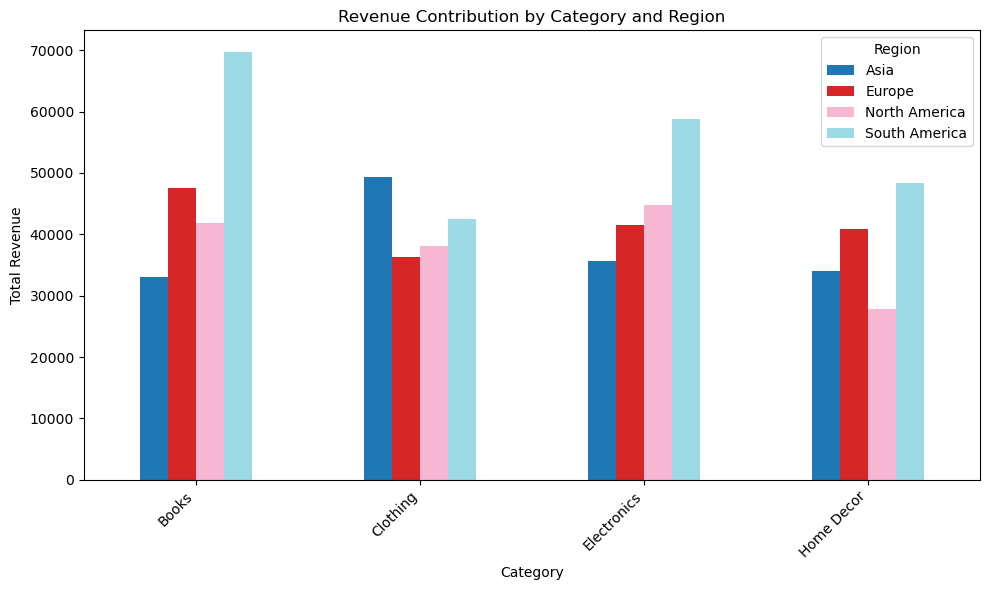

In [52]:
category_region_sales = df.groupby(['Category', 'Region'])['TotalValue'].sum().unstack().fillna(0)

# Plotting a bar chart for each category with regions as separate bars, using a different color palette
category_region_sales.plot(kind='bar', figsize=(10, 6), colormap='tab20')

plt.title('Revenue Contribution by Category and Region')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate category names for better visibility
plt.legend(title='Region')
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()
